# ✐ Etude et traitement de signaux musicaux

In [20]:
import numpy as np
#import scipy.fft as fft
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio
from math import *
from numpy.fft import fft

### <font color='blue'> Le but de ce mini-projet est d'étudier et d'appliquer des traitements numériques  à des signaux audios de complexité croissante.
La qualité des explications et la justification des résultats seont appéciés.

### <font color='blue'> Partie 1 : Analyse d'un signal audio éléméntaire

Lire le signal "sound.wav" et écouter ce signal via le code ci-dessous. Afficher et justifier la valeur de la fréquence d'échantillonnage 

In [21]:
fe, x = wavfile.read("C:\\Your_path\\sound.wav")
n = x.size
duree = n/fe
print("Dimension de x : " + str(x.shape))
print(fe)
print(n)
print((round(duree,2)))

Dimension de x : (100000,)
44100
100000
2.27


In [22]:
Audio(x, rate=fe)

In [ ]:
#La valeur de la fréquence d'échantillonnage vaut 44100Hz.
#D'après le critère de Shanon-Nyquist, fe doit être supérieur à 2*20KHZ = 40KHz. 
#Dans notre cas, le signal est à 44,1KHz et donc supérieur au 40KHz. 
#On numérise pour ne pas avoir de recouvrement du spectre.
#On a aussi 100000 points par secondes (avec x la taille des données = 100000 Octets), et une période T = Nombre de points/Fe = 100000/44100 = 2.27s
#T=2.27s , est aussi égal au temps total du fichier audio.

En musique, un accord est une combinaison de notes jouées en même temps. Une note se caractérise par un fondamental (de fréquence bien connue, si l'instrument est bien accordé) et des harmoniques (qui constituent le timbre de l'instrument).

En zoomant sur les fréquences basses du spectre, on peut identifier les fréquences des fondamentales.
Réaliser une analyse fréquentielle du signal ("sound.wav"). Commenter.

C:\tools\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:


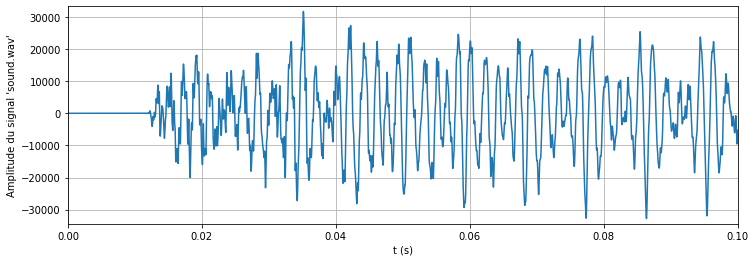

In [19]:
fe, x = wavfile.read("C:\\Your_path\\sound.wav")
n = x.size
duree = n/fe

te = 1.0/fe
t = np.zeros(n)
for k in range(n):
    t[k] = te*k
plt.figure(figsize=(12,4))
plt.plot(t,x)
plt.xlabel("t (s)")
plt.ylabel("Amplitude du signal 'sound.wav'")
plt.axis([0,0.1,x.min(),x.max()])
plt.grid()
plt.show()

In [ ]:
#La figure ci-dessus représente le signal temporel du fichier audio, avec comme données son amplitude en fonction du temps. 

NameError: name 'axis' is not defined

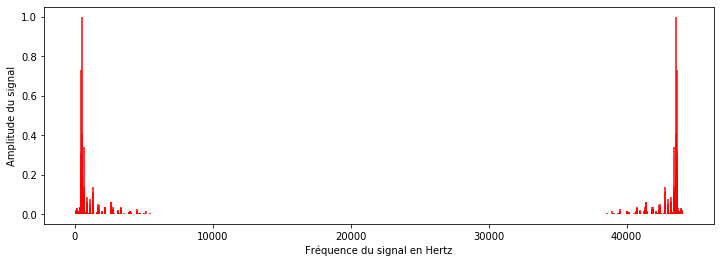

In [27]:
rate, x = wavfile.read("C:\\Your_path\\sound.wav")
n = x.size
duree = n/rate

def tracerSpectre(x,rate,debut,duree):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = np.absolute(fft(x[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    plt.vlines(freq,[0],spectre,'r')
    plt.xlabel('Fréquence du signal en Hertz')
    plt.ylabel('Amplitude du signal')
    axis([0,0.5*rate,0,1])
    grid()

plt.figure(figsize=(12,4))
tracerSpectre(x,rate,0.0,0.5)
plt.axis([0,5000,0,1])

In [ ]:
#En analysant le signal grâce à la bibliothèque de numpty, nous obtenons le spectre d'amplitude monolatérale du fichier 'sound.wav' ci-dessus.
#On constate qu'il y a une fréquence fondamentale, qui vaut environ 440Hz, et des harmoniques avec des amplitudes décroissantes.

Une note est caractérisée par sa fréquence. 440 Hz est la fréquence du la3, la note que donne le
diapason.

Produire consécutivement puis simultanément ( il suffit d ajouter les signaux (on parle de « synthèse
additive ») plusieurs notes de la gamme tempérée.
Réaliser une analyse fréquentielle de ces signaux.

In [ ]:
#Afin de répondre à cette question, nous avons réalisé l'analyse fréquentielle des signaux de chacune des notes (Do, ré, mi, fa, sol, la, si)
#Pour ce faire, nous avons changé les fréquences afin de prendre celles qui représentaient le mieux les notes de cette gamme.
#Nous avons pris 500 points par périodes, et une fréquence d'échantillonage T=1/3000 pour ajuster l'échelle de notre signal.
#Pour réaliser chaque note, nous avons dans un premier temps réaliser un code pour afficher l'analyse fréquentielle du signal, on remarque d'ailleurs un pic lorsque la fréquence de la note est atteinte.
#Puis dans un second temps, un code pour créer le son.

In [ ]:
#Note 'DO-3' de fréquence 261.6Hz

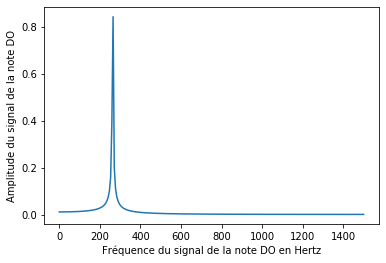

In [51]:
N = 500
T = 1.0 / 3000
x = np.linspace(0.0, N*T, N)
y1 = np.sin(261.6 * 2.0*np.pi*x)
y_f = np.fft.fft(y1)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note DO en Hertz')
plt.ylabel('Amplitude du signal de la note DO')
plt.show()

In [30]:
freq1 = 261.6
x = np.linspace(0, 1, 44100)
y01 = np.sin(2*np.pi*freq1*x)

plt.show()
Audio(y01, rate=fe)

In [ ]:
#Note 'RE-3' de fréquence 293.7Hz

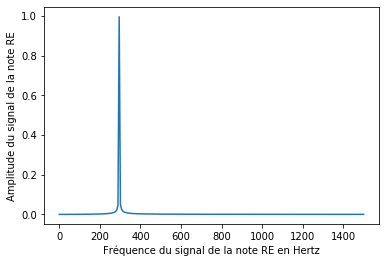

In [52]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y2 = np.sin(293.7 * 2.0*np.pi*x)
y_f = np.fft.fft(y2)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note RE en Hertz')
plt.ylabel('Amplitude du signal de la note RE')
plt.show()

In [32]:
freq2 = 293.7
x = np.linspace(0, 1, 44100)
y02 = np.sin(2*np.pi*freq2*x)

plt.show()
Audio(y02, rate=fe)

In [ ]:
#Note 'MI-3' de fréquence 329.6Hz

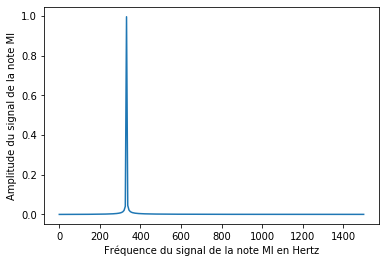

In [53]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y3 = np.sin(329.6 * 2.0*np.pi*x)
y_f = np.fft.fft(y3)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note MI en Hertz')
plt.ylabel('Amplitude du signal de la note MI')
plt.show()

In [34]:
freq3 = 329.6
x = np.linspace(0, 1, 44100)
y03 = np.sin(2*np.pi*freq3*x)

plt.show()
Audio(y03, rate=fe)

In [ ]:
#Note 'FA-3' de fréquence 349.2Hz

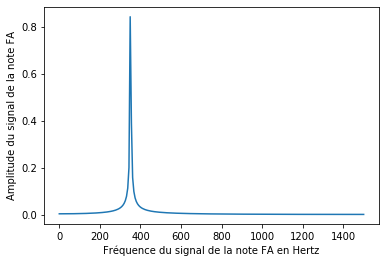

In [54]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y4 = np.sin(349.2 * 2.0*np.pi*x)
y_f = np.fft.fft(y4)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note FA en Hertz')
plt.ylabel('Amplitude du signal de la note FA')
plt.show()

In [36]:
freq4 = 349.2
x = np.linspace(0, 1, 44100)
y04 = np.sin(2*np.pi*freq4*x)

plt.show()
Audio(y04, rate=fe)

In [ ]:
#Note 'SOL-3' de fréquence 392Hz

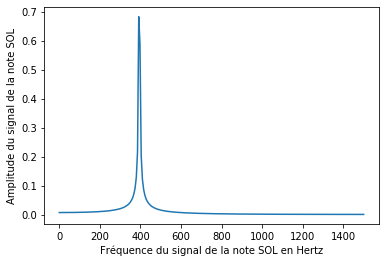

In [55]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y5 = np.sin(392 * 2.0*np.pi*x)
y_f = np.fft.fft(y5)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note SOL en Hertz')
plt.ylabel('Amplitude du signal de la note SOL')
plt.show()

In [38]:
freq5 = 392
x = np.linspace(0, 1, 44100)
y05 = np.sin(2*np.pi*freq5*x)

plt.show()
Audio(y05, rate=fe)

In [ ]:
#Note 'LA-3' de fréquence 440Hz

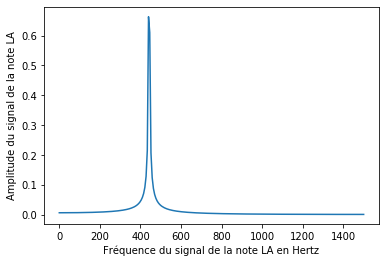

In [56]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y6 = np.sin(440 * 2.0*np.pi*x)
y_f = np.fft.fft(y6)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note LA en Hertz')
plt.ylabel('Amplitude du signal de la note LA')
plt.show()

In [40]:
freq6 = 440
x = np.linspace(0, 1, 44100)
y06 = np.sin(2*np.pi*freq6*x)

plt.show()
Audio(y06, rate=fe)

In [ ]:
#Note 'SI-3' de fréquence 493.9Hz

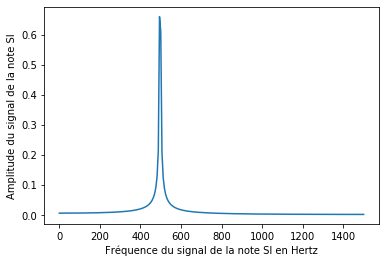

In [57]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y7 = np.sin(493.9 * 2.0*np.pi*x)
y_f = np.fft.fft(y7)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence du signal de la note SI en Hertz')
plt.ylabel('Amplitude du signal de la note SI')
plt.show()

In [42]:
freq7 = 493.9
x = np.linspace(0, 1, 44100)
y07 = np.sin(2*np.pi*freq7*x)

plt.show()
Audio(y07, rate=fe)

In [ ]:
#Par la suite, après avoir créer nos 7 sons des 7 notes différentes, nous les avons concaténées afin d'obtenir une analyse fréquentielle de la concaténation des signaux.
#Dans cette analyse fréquentielle, nous pouvons observer que toutes les fréquences sont assemblées et forment donc un signal comprenant tous les pics de chaque signaux.

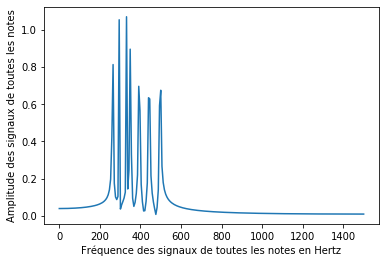

In [58]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0.0, N*T, N)
y8 = np.sin(261.6 * 2.0*np.pi*x) + np.sin(293.7 * 2.0*np.pi*x) + np.sin(329.6 * 2.0*np.pi*x) + np.sin(349.2 * 2.0*np.pi*x) + np.sin(392 * 2.0*np.pi*x) + np.sin(440 * 2.0*np.pi*x) + np.sin(493.9 * 2.0*np.pi*x)
y_f = np.fft.fft(y8)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.xlabel('Fréquence des signaux de toutes les notes en Hertz')
plt.ylabel('Amplitude des signaux de toutes les notes')
plt.show()

In [ ]:
#Afin d'obtenir le son final avec chaque notes jouées les unes après les autres, nous avons utilisé le principe de la concaténation et insérer la formule np.concatenate, qui ajoute les signaux demandés les uns après les autres.
#En jouant l'audio, on obtient donc nos 7 sons joués les uns après les autres.

In [43]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0, 1, 44100)
y01 = np.sin(2*np.pi*freq1*x)
y02 = np.sin(2*np.pi*freq2*x)
y03 = np.sin(2*np.pi*freq3*x)
y04 = np.sin(2*np.pi*freq4*x)
y05 = np.sin(2*np.pi*freq5*x)
y06 = np.sin(2*np.pi*freq6*x)
y07 = np.sin(2*np.pi*freq7*x)

audio=np.concatenate((y01, y02, y03, y04, y05, y06, y07))

plt.show()
Audio(audio, rate=fe)

In [ ]:
#Enfin, pour obtenir un son où tous les sons se jouent en même temps, et donc où toutes les fréquences s'ajoutent, nous les avons ajouté puis créé le son final.

In [44]:
N = 500
T = 1.0 / 3000.0
x = np.linspace(0, 1, 44100)
y01 = np.sin(2*np.pi*freq1*x)
y02 = np.sin(2*np.pi*freq2*x)
y03 = np.sin(2*np.pi*freq3*x)
y04 = np.sin(2*np.pi*freq4*x)
y05 = np.sin(2*np.pi*freq5*x)
y06 = np.sin(2*np.pi*freq6*x)
y07 = np.sin(2*np.pi*freq7*x)

tot=np.sin(y01 + y02 + y03 + y04 + y05 + y06 + y07)

plt.show()
Audio(tot, rate=fe)

### <font color='blue'> Partie 2 : Etude de différents signaux audios.
Télécharger au choix une dizaine signaux audios à partir du lien 
https://www.dsprelated.com/freebooks/pasp/Sound_Examples.html

Présenter dans un tableau les différentes caractéristiques de ces signaux, Fréquence d'echantillonnage, spectre en amplitude

Synthétiser un signal audio comportant une suite de trois instruments puis réaliser un mixage de plusieurs instruments

Traitement : réaliser une moyenne mobile exponentielle.

### <font color='blue'> Partie 3 : Traitement et filtrage : 


La moyenne mobile exponentielle permet de lisser une courbe pour mettre en évidence son allure en supprimer les écarts ponctuels et le bruit. L'équation permettant de calculer la moyenne mobile $s_n$ quelque soit $n$ est :
$$s_n=\alpha e_n +(1-\alpha)s_{n-1}$$
Avec : $s_0$ une moyenne des premières valeurs ;
$α=\frac{2}{N+1}$.
la constante de lissage où $N$ est un entier à choisir en fonction de la précision voulue (tester plusieurs valeurs pour obtenir un résultat cohérent).

Appliquer plusieurs filtrages au signaux de la partie 2 : de type passe haut, de type passe passe bas. Vous présenterez les résultats du filtrage et vous justifierez vos choix de paramètres.

In [ ]:
#Type passe bas

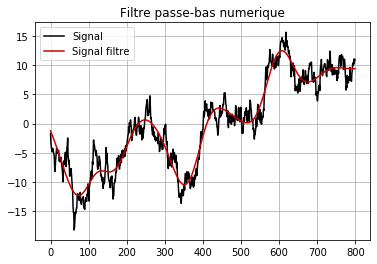

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from scipy import signal

# Fréquence d'échantillonnage
fe = 20 # Hz

sig = np.cumsum(randn(800))

# Fréquence de nyquist
f_nyq = fe / 2. # Hz

# Fréquence de coupure
fc = 0.2 # Hz

# Préparation du filtre de Butterworth en passe-bas
b, a = signal.butter(4, fc/f_nyq, 'low', analog=False)

# Application du filtre
s_but = signal.filtfilt(b, a, sig)


# Affichage du signal filtré
plt.plot(sig, color='black', label='Signal')
plt.plot(s_but, color='#cc0000', label='Signal filtre')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.title("Filtre passe-bas numerique")
plt.show()

In [ ]:
#Grâce à la fonction np.cumsum(), nous avons pu générer un signal de manière alétaoire et appliquer un filtre passe-bas et lisser ce signal filtré grâce à la fonction  Butterworth.
#Il faut que filtrage soit réalisé au dessus de fc/f_nyq.

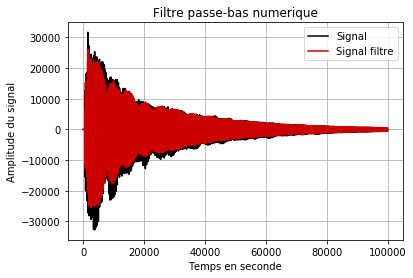

NameError: name 'axis' is not defined

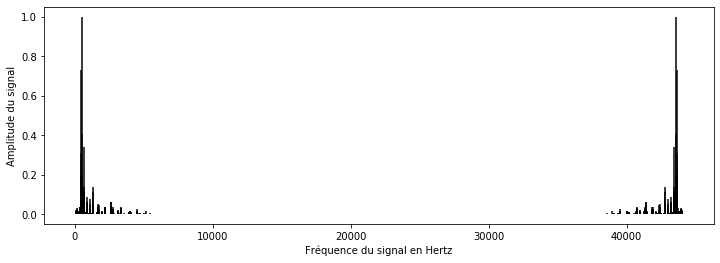

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from scipy.io import wavfile
from scipy import signal
from numpy.fft import fft

#sig = np.cumsum(randn(800))
fe, sig = wavfile.read("C:\\Your_path\\sound.wav")
# Fréquence de nyquist
f_nyq = fe / 2. # Hz

# Fréquence de coupure
fc = 800 # Hz

# Préparation du filtre de Butterworth en passe-bas
b, a = signal.butter(4, fc/f_nyq, 'low', analog=False)

# Application du filtre
s_but = signal.filtfilt(b, a, sig)


# Affichage du signal filtré
plt.plot(sig, color='black', label='Signal')
plt.plot(s_but, color='#cc0000', label='Signal filtre')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.xlabel('Temps en seconde')
plt.ylabel('Amplitude du signal')
plt.title("Filtre passe-bas numerique")
plt.show()

Audio(sig, rate=fe)

def tracerSpectre(x,rate,debut,duree):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = np.absolute(fft(x[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    plt.vlines(freq,[0],spectre,'black')
    plt.xlabel('Fréquence du signal en Hertz')
    plt.ylabel('Amplitude du signal')
    axis([0,0.5*rate,0,1])
    grid()

plt.figure(figsize=(12,4))
tracerSpectre(sig,fe,0.0,0.5)
plt.axis([0,5000,0,1])

In [72]:
Audio(sig, rate=fe)

In [73]:
Audio(s_but, rate=fe)

In [ ]:
#Au lieu de générer un signal random, nous avons généré le signal du fichier son "sound.wav". 
#Puis, nous avons réalisé le filtrage numérique passe-bas sur ce signal, comme on peut le voir sur le graphe.

In [ ]:
#Type passe-haut

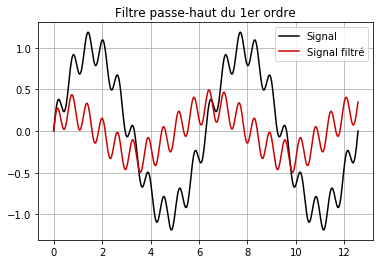

In [80]:
x = np.linspace(0, 4*np.pi, 1000)
e = np.sin(x)+0.2*np.sin(10*x)

# Fréquence de coupure
fc = 0.5 # Hz
tau = 1/(2*np.pi*fc)

# Période d'échantillonnage
Te = 4*np.pi/1000 # s

# Préparation de la liste de sortie
s_ph = []
s_ph.append(0)

# Application du filtre
for i in range(1, len(e)):
    s_ph.append(s_ph[i-1]*(1-Te/tau)+e[i]-e[i-1])

# Affichage du signal filtré
plt.plot(x, e, color='black', label='Signal')
plt.plot(x, s_ph, color='#cc0000', label='Signal filtré')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.title("Filtre passe-haut du 1er ordre")
plt.show()